# PPIN_source_target analysis

In [1]:
import os 
import subprocess
import shutil
from SBL.SBL_pytools import SBL_pytools as sblpyt

from SBL.SBL_Genetrank_application import Genetrank_application
 
from SBL.SBL_Genetrank_gene_to_protein import *

# Step 0 / Pre-processing:

## Convert the genes into targets i.e. protein identifiers

In [2]:
genes  = [line.rstrip() for line in open("data/proteins-targets-apoptosis-49-entries.in").readlines()]
print(genes)
translator = Genetrank_GeneProteinTranslator('hsapiens', direction='protein2gene')
translations = translator.translate(genes)
print(translations)
translations.summary()


['O43464', 'P19438', 'Q07817', 'O43521', 'D3DV04', 'P20333', 'Q13489', 'Q6FH21', 'P55211', 'O95831', 'Q13794', 'Q15628', 'Q8IX12', 'P98170', 'P55957', 'Q8WZ73', 'Q86W13', 'O14763', 'Q13618', 'Q07812', 'P62877', 'Q13546', 'Q9UMX3', 'P55210', 'O14798', 'Q9BXH1', 'O15392', 'Q13158', 'Q9NZS9', 'P21580', 'Q92843', 'O15519', 'P08574', 'P42575', 'P10415', 'O00198', 'O00220', 'Q92851', 'Q8WXG6', 'Q16611', 'Q13323', 'Q96LC9', 'Q13490', 'Q9NR28', 'P42574', 'Q14790', 'Q9UBN6', 'P25445', 'O14727']
Succesful Translations:
	O43464:	HTRA2
	P19438:	TNFRSF1A
	Q07817:	BCL2L1
	O43521:	BCL2L11
	P20333:	TNFRSF1B
	Q13489:	BIRC3
	P55211:	CASP9
	O95831:	AIFM1
	Q13794:	PMAIP1
	Q15628:	TRADD
	Q8IX12:	CCAR1
	P98170:	XIAP
	P55957:	BID
	Q8WZ73:	RFFL
	O14763:	TNFRSF10B
	Q13618:	CUL3
	Q07812:	BAX
	P62877:	RBX1
	Q13546:	RIPK1
	Q9UMX3:	BOK
	P55210:	CASP7
	O14798:	TNFRSF10C
	Q9BXH1:	BBC3
	O15392:	BIRC5
	Q13158:	FADD
	Q9NZS9:	BFAR
	P21580:	TNFAIP3
	Q92843:	BCL2L2
	O15519:	CFLAR
	P08574:	CYC1
	P42575:	CASP2
	P10415:	BCL2

# A Step-by-step analysis

In [3]:
from SBL.SBL_Genetrank_application import Genetrank_application
from SBL.SBL_pytools import *

odir = "test5s"
if os.path.exists(odir):
    pass
    #os.system( ("rm -rf %s" % odir))
os.system( ("mkdir -p %s" % odir))

ppin_file_path = 'data/MINT-human-august2020.in'
sources_file_path = 'data/proteins-sources-5-entries.in'
targets_file_path = 'data/proteins-targets-apoptosis-49-entries.in'
pathways_dir_path = '/tmp/pathways'
os.mkdir(pathways_dir_path)

app = Genetrank_application(odir)
app.add_ppin_file(ppin_file_path)
app.add_sources_file(sources_file_path)
app.add_targets_file(targets_file_path)
app.add_pathways_dir(pathways_dir_path)
app.add_restart_probability(0.01)
app.add_restart_probability(0.3)

app.generate_inputs()
app.instantiate_simulations()

In [4]:
def odir_tree(highlight_pattern='^'):
    cmd = "tree %s | grep --color=always -e '^' -e '%s'" % (odir, highlight_pattern)
    tree = ''.join(os.popen(cmd).readlines())
    return tree

 ##  Step 1:  generating the Markov chains 
 
 Uses the executable `sbl-genetrank-Markov-models.exe` to generate the Markov Chain `.mcl` transition matrix files to be used by MARMOTE. These files are one per source, named `mcr_<internal_source_id>.mcl`. `markov_chain.mcl` contains the normalization Markov Chain's transition matrix.
 
 `source_idx.txt`, `target_idx.txt`, and `map_protein_name_idx.txt` are also produced to be used to cross-reference the identifiers used internally by the executable with the protein identifiers.

In [5]:
app.generate_markov_chains()

print(odir_tree('*.mcl'))

Creating directory for r=0.01 (cmd=mkdir -p test5s/r0.01)
Creating directory for r=0.30 (cmd=mkdir -p test5s/r0.30)

Generating Markov Chains (one for each source)...

	PPIN = MINT-human-august2020
	SOURCES = proteins-sources-5-entries
	TARGETS = proteins-targets-apoptosis-49-entries
	r = 0.01
	Running cmd=/home/asq/Dev/inria/projects/sbl/Applications/Genetrank/src/build/sbl-genetrank-Markov-models.exe -g data/MINT-human-august2020.in -p /tmp/pathways -s data/proteins-sources-5-entries.in -t data/proteins-targets-apoptosis-49-entries.in -r 0.01 -o test5s/r0.01


Generating Markov Chains (one for each source)...
	PPIN = MINT-human-august2020
	SOURCES = proteins-sources-5-entries
	TARGETS = proteins-targets-apoptosis-49-entries
	r = 0.30
	Running cmd=/home/asq/Dev/inria/projects/sbl/Applications/Genetrank/src/build/sbl-genetrank-Markov-models.exe -g data/MINT-human-august2020.in -p /tmp/pathways -s data/proteins-sources-5-entries.in -t data/proteins-targets-apoptosis-49-entries.in -r 0.3

## Step 2: computing  hit probabilities

Uses the executable `sbl-genetrank-hit-probabilities.exe` to calculate the pairwise hit probabilities which are written to `hit-vectors.txt` and the centrality for normalization, written to `normalization-distribution.txt`

In [6]:
app.calculate_hit_probabilities()

print(odir_tree())



Calculating Hit Probability Vectors...


Calculating Hit Probability Vectors...
	PPIN = MINT-human-august2020
	SOURCES = proteins-sources-5-entries
	TARGETS = proteins-targets-apoptosis-49-entries
	r = 0.30	PPIN = MINT-human-august2020
	SOURCES = proteins-sources-5-entries
	TARGETS = proteins-targets-apoptosis-49-entries
	r = 0.01
	Running cmd=/home/asq/Dev/inria/projects/sbl/Applications/Genetrank/src/build/sbl-genetrank-hit-probabilities.exe -i test5s/r0.30/MINT-human-august2020_proteins-sources-5-entries_proteins-targets-apoptosis-49-entries_r0.30 -o test5s/r0.30/MINT-human-august2020_proteins-sources-5-entries_proteins-targets-apoptosis-49-entries_r0.30 | grep Status

	Running cmd=/home/asq/Dev/inria/projects/sbl/Applications/Genetrank/src/build/sbl-genetrank-hit-probabilities.exe -i test5s/r0.01/MINT-human-august2020_proteins-sources-5-entries_proteins-targets-apoptosis-49-entries_r0.01 -o test5s/r0.01/MINT-human-august2020_proteins-sources-5-entries_proteins-targets-apoptosis-4

## Step 3: computing  scores

Scores are calculated by the `Genetrank_simulation_result` class within `SBL_Genetrank_simulation.py` using the results from the previous step. Pairwise scores are written to `<sources_file_name>_<targets_file_name>_pairwise_scores.csv`

In [7]:
app.calculate_scores()

print(odir_tree())

test5s
├── figures
│   └── r0.30
├── r0.01
│   ├── MINT-human-august2020_proteins-sources-5-entries_proteins-targets-apoptosis-49-entries_r0.01
│   │   ├── hit-vectors.txt
│   │   ├── map_protein_name_idx.txt
│   │   ├── markov_chain.mcl
│   │   ├── mcr_2437.mcl
│   │   ├── mcr_3187.mcl
│   │   ├── mcr_3480.mcl
│   │   ├── mcr_420.mcl
│   │   ├── mcr_679.mcl
│   │   ├── normalization-distribution.txt
│   │   ├── source_idx.txt
│   │   ├── source_names.txt
│   │   └── target_idx.txt
│   ├── MINT-human-august2020_proteins-targets-apoptosis-49-entries_proteins-sources-5-entries_r0.01
│   │   ├── hit-vectors.txt
│   │   ├── map_protein_name_idx.txt
│   │   ├── markov_chain.mcl
│   │   ├── mcr_10406.mcl
│   │   ├── mcr_10715.mcl
│   │   ├── mcr_1560.mcl
│   │   ├── mcr_2123.mcl
│   │   ├── mcr_2292.mcl
│   │   ├── mcr_2743.mcl
│   │   ├── mcr_2777.mcl
│   │   ├── mcr_2823.mcl
│   │   ├── mcr_2995.mcl
│   │   ├── mcr_3584.mcl
│   │   ├── mcr_3585.mcl
│   │   ├── mcr_385.mcl
│   │   ├── mcr_4

# Step 4: visualization with radar (scatter) plots

## 1. Individual Radar Plots

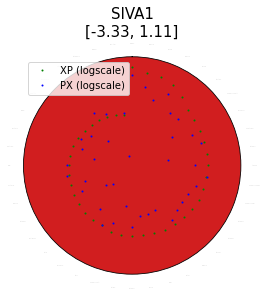

In [8]:
from SBL import SBL_Genetrank_simulation_statistics
from SBL_Genetrank_simulation_statistics import Genetrank_simulation_visualizations

r03_simulation = app.get_simulation(ppin_file_path, sources_file_path, targets_file_path, pathways_dir_path, 0.3)
r03_simulation_visualizations = Genetrank_simulation_visualizations(r03_simulation)
r03_simulation_visualizations.generate_gene_score_radar('SIVA1', show=True)

## 2. Radar Scatter Plots

In [12]:
app.logFC_logCPM_file = 'data/CellFate-LogCPM-LogFC-pval-FDR-mmc4.xls'
app.generate_gene_score_radar_scatter_plots()

print(odir_tree())

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


test5s
├── figures
│   ├── r0.01
│   │   └── score_radar_scatter.pdf
│   └── r0.30
│       └── score_radar_scatter.pdf
├── r0.01
│   ├── MINT-human-august2020_proteins-sources-5-entries_proteins-targets-apoptosis-49-entries_r0.01
│   │   ├── hit-vectors.txt
│   │   ├── map_protein_name_idx.txt
│   │   ├── markov_chain.mcl
│   │   ├── mcr_2437.mcl
│   │   ├── mcr_3187.mcl
│   │   ├── mcr_3480.mcl
│   │   ├── mcr_420.mcl
│   │   ├── mcr_679.mcl
│   │   ├── normalization-distribution.txt
│   │   ├── source_idx.txt
│   │   ├── source_names.txt
│   │   └── target_idx.txt
│   ├── MINT-human-august2020_proteins-targets-apoptosis-49-entries_proteins-sources-5-entries_r0.01
│   │   ├── hit-vectors.txt
│   │   ├── map_protein_name_idx.txt
│   │   ├── markov_chain.mcl
│   │   ├── mcr_10406.mcl
│   │   ├── mcr_10715.mcl
│   │   ├── mcr_1560.mcl
│   │   ├── mcr_2123.mcl
│   │   ├── mcr_2292.mcl
│   │   ├── mcr_2743.mcl
│   │   ├── mcr_2777.mcl
│   │   ├── mcr_2823.mcl
│   │   ├── mcr_2995.mcl
│   │